# Symmetric models

In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/stella/')
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/scripts/')
import utils


## Setting up the parameters

In [2]:
lc, _ = utils.import_lightcurve('../data/s0028/target/0000/0003/9452/1607/hlsp_tess-spoc_tess_phot_0000000394521607-s0028_tess_v1_lc.fits')

In [3]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 5                        #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

time_diff = np.median(np.diff(lc['TIME']))
num_cadences = 450

# Calculate the total time spanned by the cadences
total_time = num_cadences * time_diff

# Calculate the start time such that the transit is centered
start_time = -total_time / 2

# Create an array of time points centered around the transit
t = np.arange(start_time, start_time + total_time, time_diff)



#t = np.arange(-1, 1 + num_cadences * time_diff, time_diff) #np.linspace(-0.025, 0.025, 500)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)

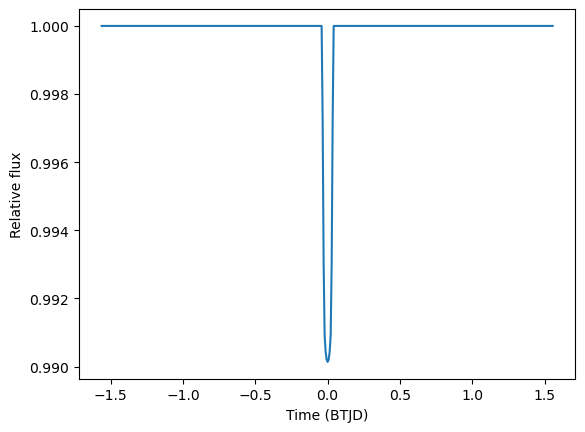

In [4]:
plt.plot(t, flux)
plt.xlabel("Time (BTJD)")
plt.ylabel("Relative flux")
plt.show()

---

### Time array from example lightcurve

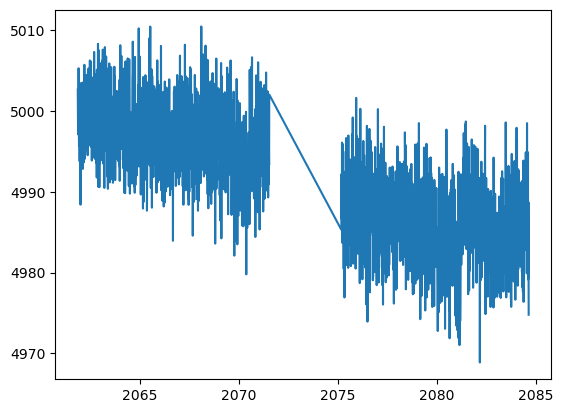

In [5]:
plt.plot(lc['TIME'],lc['SAP_FLUX'])

## Inject the exoplanet model and create the cutout
- Since `batman` creates models for us, instead of using `stella` to cut the cadences I create a 450 cadence cutout of the lightcurve and inject the model in one go.

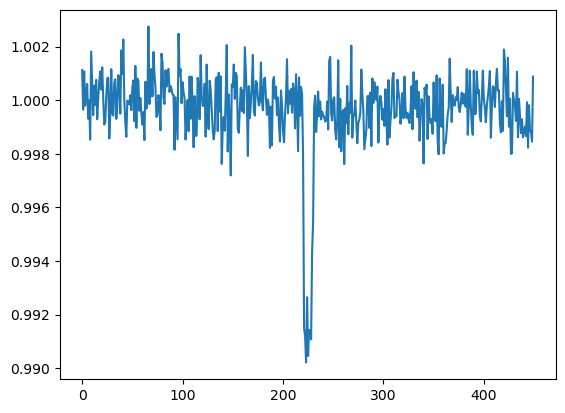

In [17]:
# Select a random start index for the time range in 'lc['TIME']'
start_index_lc = np.random.randint(0, len(lc['TIME']) - length_f)

# Get the corresponding time range from 'lc['TIME']'
selected_range_lc_time = lc['TIME'][start_index_lc:start_index_lc + length_f]

# Find the corresponding index offset in 't'
index_offset = start_index_lc

# Extract the corresponding time range from 't'
selected_range_t = t[index_offset:index_offset + length_f]

# Multiply 'f' with the flux values at the selected indices
new_flux = flux * lc['SAP_FLUX'][index_offset:index_offset + length_f]/np.nanmedian(lc['SAP_FLUX'])

plt.plot(new_flux)


In [26]:
flux

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

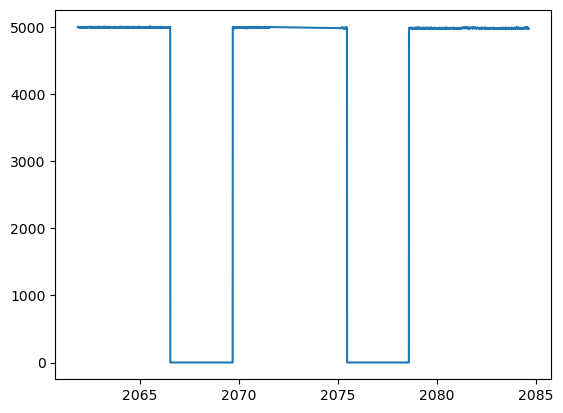

In [23]:
#Inject the transit flux into the entire lightcurve
lc['SAP_FLUX'][index_offset:index_offset + length_f] = new_flux

# Plot the entire lightcurve with the transit injected
plt.plot(lc['TIME'], lc['SAP_FLUX'])

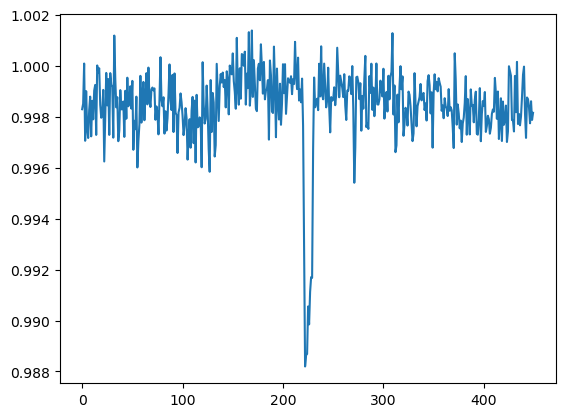

In [9]:





for i in tqdm(files[0:20000]):
    try:
        lc, info = utils.import_lightcurve(i)
    
        # Select a random start index for the time range in 'lc['TIME']'
        start_index_lc = np.random.randint(0, len(lc['TIME']) - length_f)
        
        # Get the corresponding time range from 'lc['TIME']'
        selected_range_lc_time = lc['TIME'][start_index_lc:start_index_lc + length_f]
        
        # Find the corresponding index offset in 't'
        index_offset = start_index_lc
        
        # Extract the corresponding time range from 't'
        selected_range_t = t[index_offset:index_offset + length_f]
        
        # Multiply 'f' with the flux values at the selected indices
        new_flux = flux * lc['SAP_FLUX'][index_offset:index_offset + length_f]/np.nanmedian(lc['SAP_FLUX'])
        
            # Initialize a flag to indicate whether a valid time has been found
        valid_time_found = False
    
        while not valid_time_found:
            t0 = np.random.uniform(lc['TIME'][0], lc['TIME'][-1])
        
            # Check if the current random start time falls within any large gap or within 1.5 days before or after a gap
            for index in large_gaps_indices:
                start_time = lc['TIME'][index] - 1
                end_time = lc['TIME'][index + 1] + 1
                if start_time <= t0 <= end_time:
                    # Current random start time falls within a data gap or within 1.5 days before or after a gap, select a new one
                    break
                elif index < len(lc['TIME']) - 1 and diff[index] > 0.5 and abs(t0 - lc['TIME'][index + 1]) < 1.5:
                    # Current random start time is within 1.5 days after a data gap, select a new one
                    break
                elif index > 0 and diff[index - 1] > 0.5 and abs(t0 - lc['TIME'][index]) < 1.5:
                    # Current random start time is within 1.5 days before a data gap, select a new one
                    break
                elif t0 <= lc['TIME'][0] + 1:
                    # Current random start time is within one day after the beginning of the lightcurve, select a new one
                    break
                elif t0 >= lc['TIME'][-1] - 2:
                    # Current random start time is within two days before the end of the lightcurve, select a new one
                    break
            else:
                # Current random start time doesn't fall within any data gap, 1.5 days before or after a gap, or special conditions, set the flag to True
                valid_time_found = True


        model = 1 - models.comet_curve(lc['TIME'], A, t0)
        flux = model * flat_flux
        #flux = flux/np.nanmedian(lc['SAP_FLUX'])
        fluxerror = np.array(lc['SAP_FLUX_ERR'] / np.nanmedian(lc['SAP_FLUX']))
    
        time = np.array(lc['TIME'])
        flux = np.array(flux)
        times.append(t0)
        ticid.append(tic)
    
        np.save(f"../models/{info['TICID']}_sector28.npy", np.array([time, flux, fluxerror]))
        #np.save(f"../models/{info['TICID']}_sector28-time.npy", np.array([t0]))
    except TypeError as e:
        fails.append(i)
        print(f"Exception occurred for file {i}: {e}. Continuing...")
        continue

In [36]:
flux = m.light_curve(params)

## Exoplanet

## Eclipse (Secondary)

In [38]:
params.fp = 0.001
params.t_secondary = 0.5

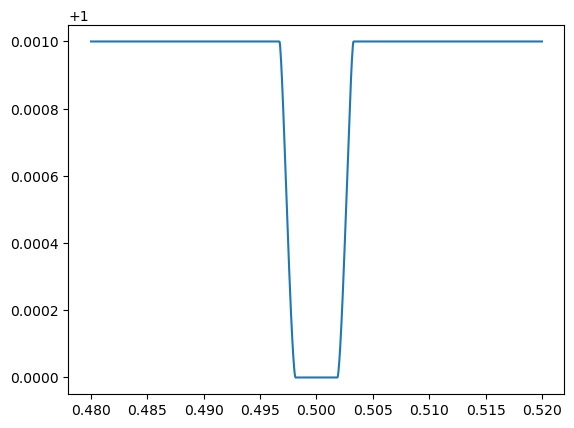

In [39]:
t = np.linspace(0.48, 0.52, 1000)
m = batman.TransitModel(params, t, transittype="secondary")
flux = m.light_curve(params)
plt.plot(t, flux)